In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from matplotlib import pyplot

# Initial Exploration

In [2]:
# Load data here
fifaData = pd.read_csv("fifa23.csv")

In [3]:
fifaData.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [4]:
fifaData.shape

(18539, 89)

# Transform the data

In [5]:
labelEncoder = preprocessing.LabelEncoder()
categoricalVariables = ["Nationality", 'Club Name', 'Best Position', 'Defensive Work Rate']
fifaData[categoricalVariables] = fifaData[categoricalVariables].apply(labelEncoder.fit_transform)

In [6]:
LABEL = "Wage(in Euro)"
FEATURES = ["Nationality", 'Club Name', 'Best Position', 'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle','Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats']

X = fifaData[FEATURES]
ogX = fifaData[FEATURES +["Age", "BaseStats", "TotalStats", "Release Clause", "International Reputation", "Overall", "Potential", "ST Rating","LW Rating","LF Rating","CF Rating","RF Rating","RW Rating","CAM Rating","LM Rating","CM Rating","RM Rating","LWB Rating","CDM Rating","RWB Rating","LB Rating","CB Rating","RB Rating"]]
Y = fifaData[LABEL]

# Initial Model

In [8]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=101)

#fit the  model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
print(model.score(X_test, y_test))
# will have some really poor performance

0.321553732048531


# Feature Importance

Feature: 0, Score: -4.77919
Feature: 1, Score: 0.36235
Feature: 2, Score: -46.59814
Feature: 3, Score: -439.86193
Feature: 4, Score: 169.86216
Feature: 5, Score: 434.60787
Feature: 6, Score: -151.11899
Feature: 7, Score: 109.19559
Feature: 8, Score: -58.76141
Feature: 9, Score: -324.72992
Feature: 10, Score: 135.15913
Feature: 11, Score: -157.56849
Feature: 12, Score: 191.20154
Feature: 13, Score: 194.44247
Feature: 14, Score: 149.03608
Feature: 15, Score: 60.99880
Feature: 16, Score: 147.90436
Feature: 17, Score: 50.84898
Feature: 18, Score: 71.32766
Feature: 19, Score: 197.38133
Feature: 20, Score: -34.09869
Feature: 21, Score: 40.45854
Feature: 22, Score: -26.01506
Feature: 23, Score: 760.47373
Feature: 24, Score: 123.00162
Feature: 25, Score: -21.84398
Feature: 26, Score: 120.86671
Feature: 27, Score: 23.23688
Feature: 28, Score: 73.82748
Feature: 29, Score: -160.32125
Feature: 30, Score: 135.12009
Feature: 31, Score: 15.12443
Feature: 32, Score: -20.78296
Feature: 33, Score: 120.3

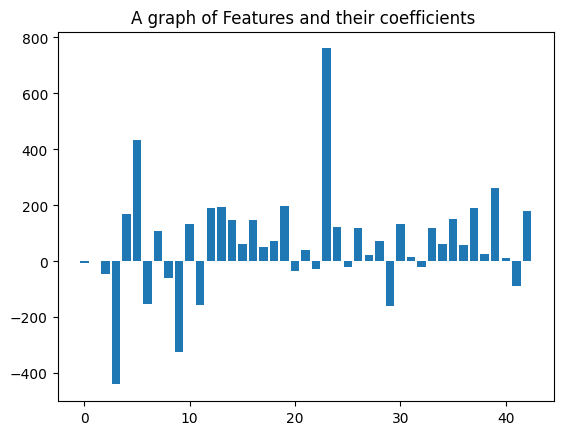

In [10]:
# feature importance
importance = model.coef_
thresholdColumns = []
# # summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
	if v >=100:
		thresholdColumns.append(i)
# plot feature importance
pyplot.title("A graph of Features and their coefficients ")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [11]:
thresholdColumns

[4, 5, 7, 10, 12, 13, 14, 16, 19, 23, 24, 26, 30, 33, 35, 37, 39, 42]

# Second Regression Model

In [12]:
cols = X.columns

In [13]:
thresholdColumns
print(thresholdColumns)
# get column names for each threshold.
# change in place since thresholdColumns returns index values for the main datasets columns(cols)
for i in range(len(thresholdColumns)):
    thresholdColumns[i] = cols[thresholdColumns[i]]

[4, 5, 7, 10, 12, 13, 14, 16, 19, 23, 24, 26, 30, 33, 35, 37, 39, 42]


In [15]:
LABEL = "Wage(in Euro)"
FEATURES = thresholdColumns #will use less columns here because of the threshold value for columns

X = fifaData[FEATURES]
Y = fifaData[LABEL]

In [16]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=101)

#INITIALIZE AND FIT THE MODEL
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
model.score(X_test, y_test) #r^2 score

0.3078603091103481

# Model with added features (best Performing)

In [14]:
FEATURES = FEATURES +["Age", "BaseStats", "TotalStats", "Release Clause", "International Reputation", "Overall", "Potential", "ST Rating","LW Rating","LF Rating","CF Rating","RF Rating","RW Rating","CAM Rating","LM Rating","CM Rating","RM Rating","LWB Rating","CDM Rating","RWB Rating","LB Rating","CB Rating","RB Rating"]
X = fifaData[FEATURES]
Y = fifaData[LABEL]

In [15]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    ogX, Y, test_size=0.3, random_state=101)
    
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
print(model.score(X_test, y_test))

0.7238380545036831
